The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology<br>

Author: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

----------------

This notebook demonstrates reading two locally stored NASA/JPL UAVSAR single look complex (SLC) data files and generating an interferogram.

Download data from:

http://downloaduav2.jpl.nasa.gov/Release21/SanAnd_05508_03/SanAnd_05508_09006_002_090218_L090HH_03_BC_s1_2x8.slc
http://downloaduav2.jpl.nasa.gov/Release21/SanAnd_05508_03/SanAnd_05508_09048_005_090718_L090HH_03_BC_s1_2x8.slc

More SLC data can be found at https://uavsar.jpl.nasa.gov/cgi-bin/data.pl

More information about UAVSAR can be found at https://uavsar.jpl.nasa.gov/education/what-is-uavsar.html

UAVSAR data courtesy NASA/JPL-Caltech

Initial imports

The MIT pyinsar package needs to be installed

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
import numpy as np
from skimage.measure import block_reduce
from matplotlib.colors import LogNorm
from urllib.request import urlopen
from skdaccess.utilities.file_browser import FileBrowser
from pyinsar.io.uavsar import readUAVSARMetadata

Read in uavsar metadata

In [2]:
url = 'http://downloaduav2.jpl.nasa.gov/Release21/SanAnd_05508_03/SanAnd_05508_09006_002_090218_L090HH_03_BC.ann'

with urlopen(url) as url_file:
    meta = readUAVSARMetadata(url_file)

Metadata is a dictionary

In [3]:
meta['Site Description']

'Hayward Fault, CA'

Read in data.

Information on the SLC stack data format can be found at https://uavsar.jpl.nasa.gov/science/documents/stack-format.html

http://downloaduav2.jpl.nasa.gov/Release21/SanAnd_05508_03/SanAnd_05508_09006_002_090218_L090HH_03_BC_s1_2x8.slc

In [4]:
f = FileBrowser()
f.widget()

In [5]:
rows = meta['slc_1_2x8_mag.set_rows']
cols = meta['slc_1_2x8_mag.set_cols']

slc1 = np.fromfile(f.path, dtype=np.dtype('<c8')).reshape(rows,cols)

Calculate magnitude, smooth, and downsample

add choices for smoothing

In [6]:
reduced = block_reduce(np.abs(slc1),(10,10),np.median)

Plot histogram to see pixel ranges

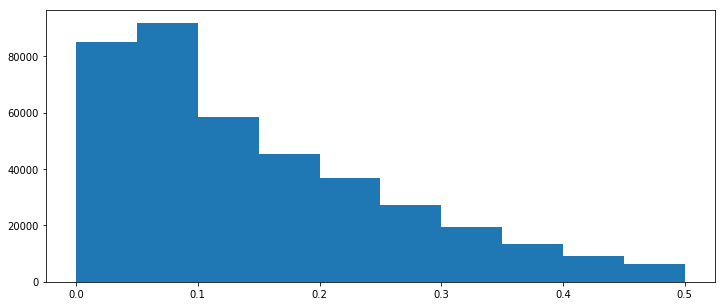

In [7]:
plt.hist(np.abs(reduced.real.ravel()),range=(0,.5),);
plt.gcf().set_size_inches(12,5)

Plot magnitude of SLC

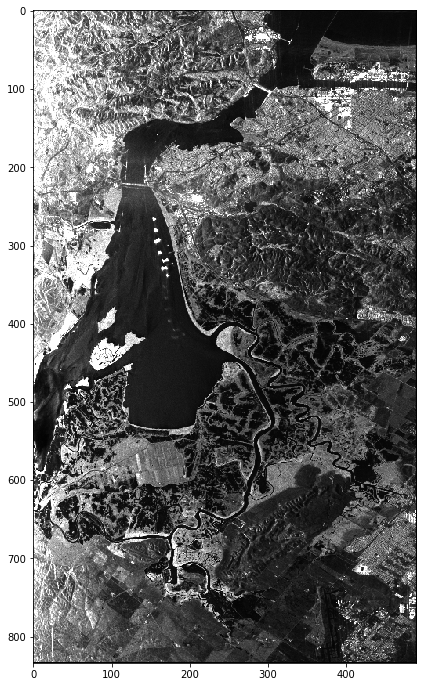

In [8]:
plt.imshow(reduced,vmin=0,vmax=0.5,cmap='gray');

Open second SLC product

http://downloaduav2.jpl.nasa.gov/Release21/SanAnd_05508_03/SanAnd_05508_09048_005_090718_L090HH_03_BC_s1_2x8.slc

In [9]:
f2 = FileBrowser()
f2.widget()

In [10]:
slc2 = np.fromfile(f2.path, dtype=np.dtype('<c8')).reshape(rows,cols)

Generate inteferogram

In [11]:
inteferogram = slc1*np.conjugate(slc2)

Calculate phase

In [12]:
phase = np.arctan2(inteferogram.imag, inteferogram.real)

Plot results

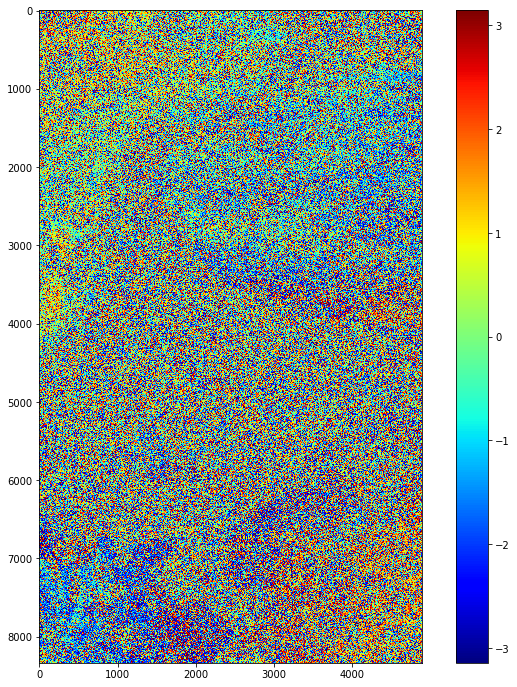

In [13]:
plt.imshow(phase,cmap='jet');
plt.colorbar();